<a href="https://colab.research.google.com/github/hunterhuang18/Learning-Machine-Learning-/blob/master/Decision_Tree%2C_Random_Forest_And_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Loan Approval Predictions

Bank loan project link : https://www.kaggle.com/datasets/vikramamin/bank-loan-approval-lr-dt-rf-and-auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive/Colab Notebooks'

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


Import all the libraries we need

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
%matplotlib inline

# 1. Introduction

## 1.1 Load the data

In [4]:
bank_loan = pd.read_csv('bankloan.csv')

In [5]:
bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
bank_loan.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
bank_loan.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 2. Exploratory Data Analysis

## 2.1 Check null values

In [8]:
bank_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
dtype: int64

## 2.2 Check duplicates

In [ ]:
bank_loan.duplicated().sum()

0

## 2.3 Explore the featrues and target variable

According to the description of the dataset, ZIP.Code has a abonormally high standard deviation, it may contains outlier.

<Axes: ylabel='ZIP.Code'>

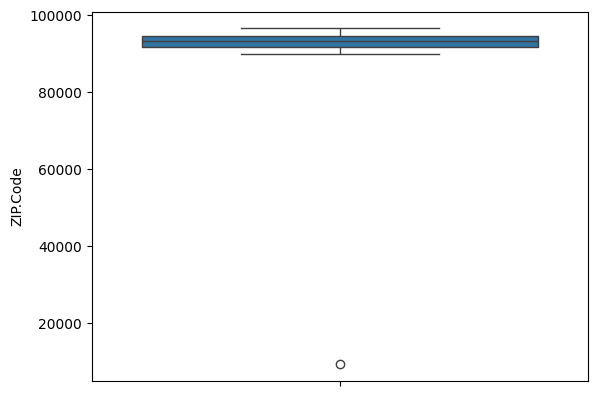

In [ ]:
sns.boxplot(bank_loan['ZIP.Code'])

We drop this outlier.

In [9]:
bank_loan.drop(bank_loan[bank_loan['ZIP.Code']==9307].index, axis=0, inplace=True)

Feature Mortagage also has a high sd, but the boxplot shows that there may be no outliers for this feature.

<Axes: ylabel='Mortgage'>

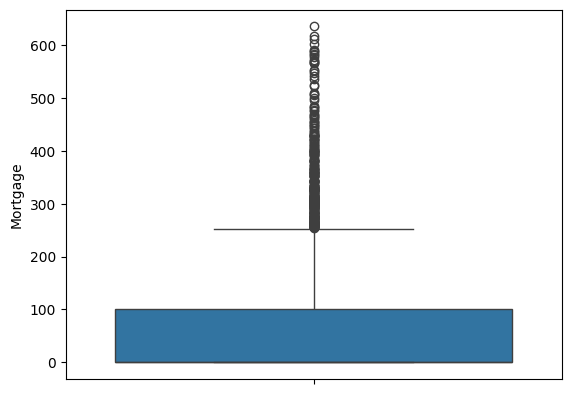

In [ ]:
sns.boxplot(bank_loan['Mortgage'])

We also explore the target variable, we found that it is an imbalanced data. Next, we tried to deal with this issue.

<Axes: xlabel='Personal.Loan', ylabel='count'>

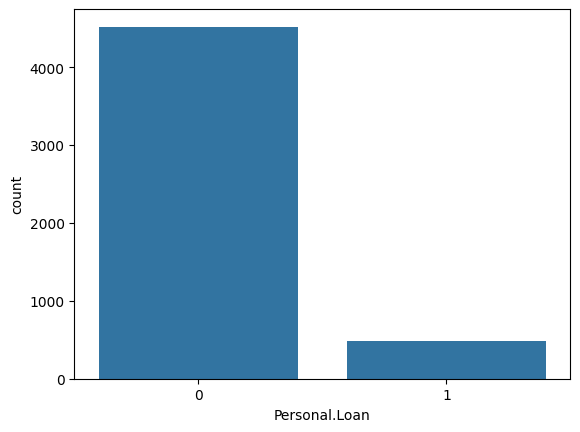

In [ ]:
sns.countplot(x=bank_loan['Personal.Loan'])

## 2.4 Handel imbalanced dataset

In [10]:
bank_loan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [11]:
X = bank_loan[['Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard']]
y = bank_loan['Personal.Loan']

We use Synthetic Minority Oversampling Technique to oversample the minority class

In [14]:
smote = SMOTE(sampling_strategy='minority', random_state=101)
X_oversample, y_oversample = smote.fit_resample(X, y)

In [15]:
oversample = pd.concat([X_oversample, y_oversample], axis=1)
oversample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9038 entries, 0 to 9037
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9038 non-null   int64  
 1   Experience          9038 non-null   int64  
 2   Income              9038 non-null   int64  
 3   ZIP.Code            9038 non-null   int64  
 4   Family              9038 non-null   int64  
 5   CCAvg               9038 non-null   float64
 6   Education           9038 non-null   int64  
 7   Mortgage            9038 non-null   int64  
 8   Securities.Account  9038 non-null   int64  
 9   CD.Account          9038 non-null   int64  
 10  Online              9038 non-null   int64  
 11  CreditCard          9038 non-null   int64  
 12  Personal.Loan       9038 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 918.0 KB


<Axes: xlabel='Personal.Loan', ylabel='count'>

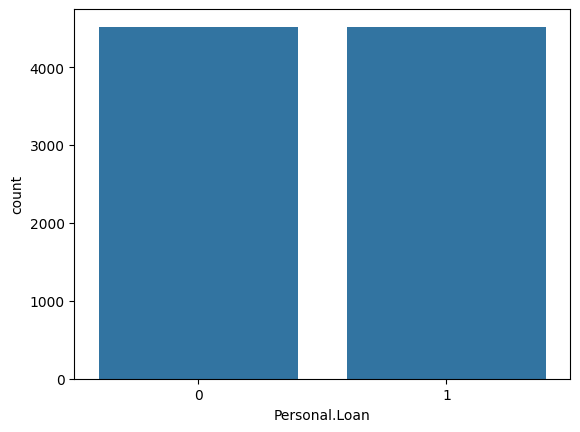

In [19]:
sns.countplot(x=oversample['Personal.Loan'])

#3. Decision Tree

##3.1 Splitting the dataset

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.3, random_state=101)

##3.2 Training and evaluating the model

In [22]:
tree = DecisionTreeClassifier(random_state=101) # we set the random_state 101 to make sure the results are consistent and comparable

In [23]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [24]:
predictions = tree.predict(X_test)

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1361
           1       0.96      0.98      0.97      1351

    accuracy                           0.97      2712
   macro avg       0.97      0.97      0.97      2712
weighted avg       0.97      0.97      0.97      2712



We also would like to know the differences between imbalanced dataset and balanced dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [28]:
predictions = tree.predict(X_test)

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1358
           1       0.91      0.94      0.93       142

    accuracy                           0.99      1500
   macro avg       0.95      0.97      0.96      1500
weighted avg       0.99      0.99      0.99      1500



The report shows that by using imbalanced dataset, accuracy score is 0.02 higher than using balanced dataset. However, precision and f1-score (macro avg) are both smaller when we use imbalanced dataset. We then return to the balanced dataset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_oversample, y_oversample, test_size=0.3, random_state=101)

## 3.3 Tuning the model

There are two hyperparameters we will try to tune up.

* min_samples_split: The minimum number of samples required to split an internal node.
Choosing a higher min_samples_split can reduce the number of splits and may help to reduce overfitting.

* max_depth: The maximum depth of the tree.
Choosing a lower max_depth can reduce the number of splits and may help to reduce overfitting.




In [31]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

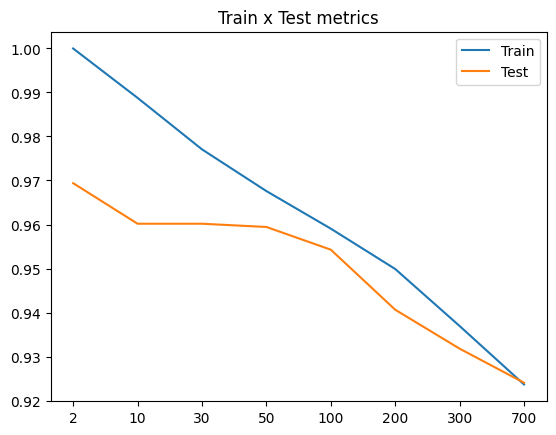

In [32]:
accuracy_test = []
accuracy_train = []
for i in min_samples_split_list:
  tree = DecisionTreeClassifier(min_samples_split = i, random_state = 101)
  tree.fit(X_train, y_train)
  predictions_train = tree.predict(X_train)
  predictions_test = tree.predict(X_test)
  accuracy_test.append(classification_report(y_test, predictions_test, output_dict=True)['accuracy'])
  accuracy_train.append(classification_report(y_train, predictions_train, output_dict=True)['accuracy'])

plt.title('Train x Test metrics')
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.legend(['Train','Test'])


Accuracy of test set decreases as the min_samples_split increase. Then we tune the max_depth.

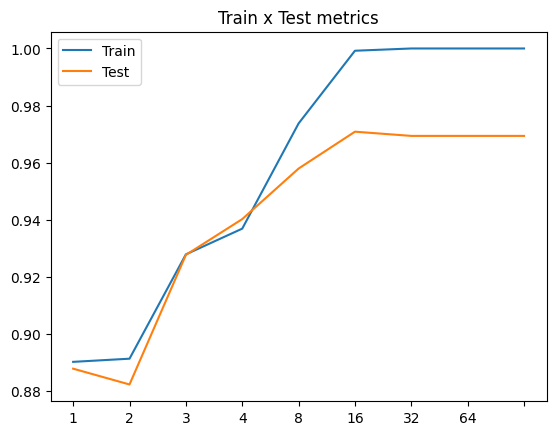

In [33]:
accuracy_test = []
accuracy_train = []
for i in max_depth_list:
  tree = DecisionTreeClassifier(max_depth = i, random_state = 101)
  tree.fit(X_train, y_train)
  predictions_train = tree.predict(X_train)
  predictions_test = tree.predict(X_test)
  accuracy_test.append(classification_report(y_test, predictions_test, output_dict=True)['accuracy'])
  accuracy_train.append(classification_report(y_train, predictions_train, output_dict=True)['accuracy'])

plt.title('Train x Test metrics')
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.legend(['Train','Test'])


In General, we see that reducing max_depth_split can reduce overfitting. When the max_depth is smaller than 16, both training and validation accuracy decreases. The tree cannot make enough splits to distinguish positives from negatives (the model is underfitting the training set). The validation accuracy reaches the highest at tree_depth=16. So we can choose the best values for these two hyper-parameters for our model to be:

max_depth = 2,

min_samples_split = 16

In [34]:
tree = DecisionTreeClassifier(min_samples_split=2, max_depth=16, random_state=101)

In [35]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=16, random_state=101)

In [36]:
predictions = tree.predict(X_test)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1361
           1       0.96      0.98      0.97      1351

    accuracy                           0.97      2712
   macro avg       0.97      0.97      0.97      2712
weighted avg       0.97      0.97      0.97      2712



#4. Raondom Forest

##4.1  Training and evaluating the model

Most of hyperparameters are the same as decision tree, one additional hyperparameter is n_estimators, which is the number of decision trees made up the forest.

In [38]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]
n_estimators_list = [10,50,100,500]

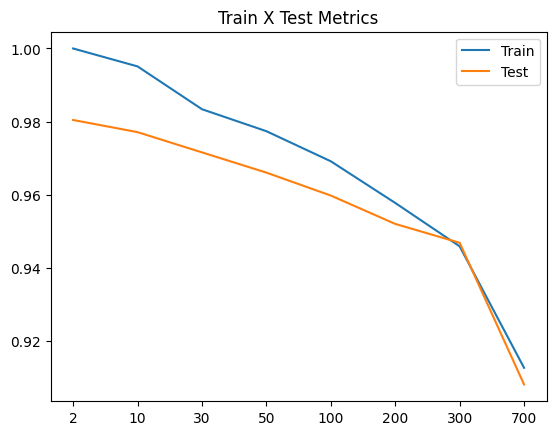

In [39]:
accuracy_test = []
accuracy_train = []
for i in min_samples_split_list:
  forest = RandomForestClassifier(min_samples_split = i, random_state = 101)
  forest.fit(X_train, y_train)
  predictions_train = forest.predict(X_train)
  predictions_test = forest.predict(X_test)
  accuracy_test.append(classification_report(y_test, predictions_test, output_dict=True)['accuracy'])
  accuracy_train.append(classification_report(y_train, predictions_train, output_dict=True)['accuracy'])

plt.title('Train X Test Metrics')
plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.xticks(ticks=range(len(min_samples_split_list)), labels=min_samples_split_list)
plt.legend(['Train', 'Test'])


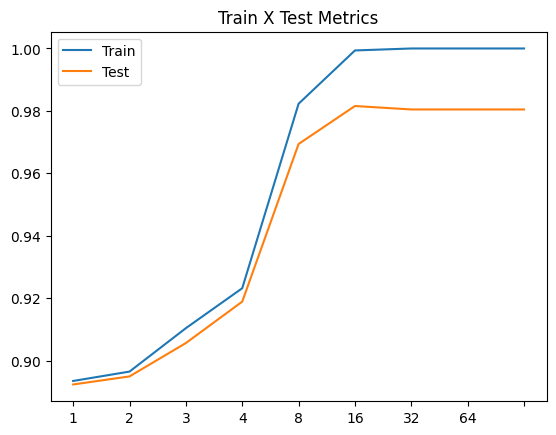

In [41]:
accuracy_test = []
accuracy_train = []
for i in max_depth_list:
  forest = RandomForestClassifier(max_depth = i, random_state = 101)
  forest.fit(X_train, y_train)
  predictions_train = forest.predict(X_train)
  predictions_test = forest.predict(X_test)
  accuracy_test.append(classification_report(y_test, predictions_test, output_dict=True)['accuracy'])
  accuracy_train.append(classification_report(y_train, predictions_train, output_dict=True)['accuracy'])

plt.title('Train X Test Metrics')
plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.xticks(ticks=range(len(max_depth_list)), labels=max_depth_list)
plt.legend(['Train', 'Test'])

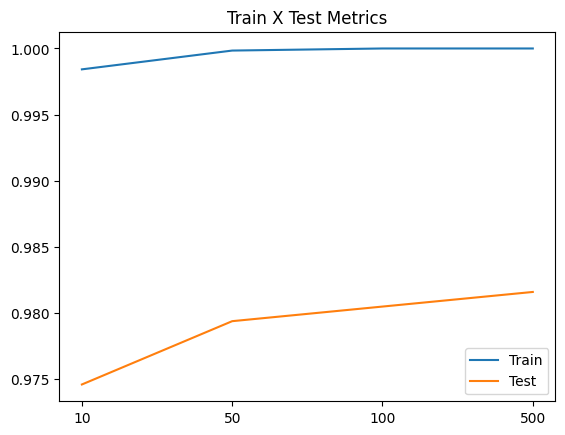

In [42]:
accuracy_test = []
accuracy_train = []

for i in n_estimators_list:
  forest = RandomForestClassifier(n_estimators = i, random_state = 101)
  forest.fit(X_train, y_train)
  predictions_train = forest.predict(X_train)
  predictions_test = forest.predict(X_test)
  accuracy_test.append(classification_report(y_test, predictions_test, output_dict=True)['accuracy'])
  accuracy_train.append(classification_report(y_train, predictions_train, output_dict=True)['accuracy'])

plt.title('Train X Test Metrics')
plt.plot(accuracy_train)
plt.plot(accuracy_test)
plt.xticks(ticks=range(len(n_estimators_list)), labels=n_estimators_list)
plt.legend(['Train', 'Test'])

In [43]:
forest = RandomForestClassifier(min_samples_split=2, max_depth=16, n_estimators=500, random_state = 101)
forest.fit(X_train, y_train)
predictions = forest.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1361
           1       0.98      0.98      0.98      1351

    accuracy                           0.98      2712
   macro avg       0.98      0.98      0.98      2712
weighted avg       0.98      0.98      0.98      2712



#5. XGBoost

In [47]:
n = int(len(X_train)*0.8)
X_train_fit, X_train_eval, y_train_fit, y_train_eval = X_train[:n], X_train[n:], y_train[:n], y_train[n:]

In [54]:
xgb_model = XGBClassifier(n_estimators_list=500, learning_rate=0.1, verbosity = 1, random_state=101)
xgb_model.fit(X_train_fit, y_train_fit, eval_set = [(X_train_eval, y_train_eval)], early_stopping_rounds=10)

[0]	validation_0-logloss:0.61160
[1]	validation_0-logloss:0.54451
[2]	validation_0-logloss:0.48928
[3]	validation_0-logloss:0.44145
[4]	validation_0-logloss:0.40200
[5]	validation_0-logloss:0.36706


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:57:52] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators_list" } are not used.

  warnings.warn(smsg, UserWarning)


[6]	validation_0-logloss:0.33721
[7]	validation_0-logloss:0.31064
[8]	validation_0-logloss:0.28808
[9]	validation_0-logloss:0.26780
[10]	validation_0-logloss:0.24987
[11]	validation_0-logloss:0.23451
[12]	validation_0-logloss:0.22017
[13]	validation_0-logloss:0.20780
[14]	validation_0-logloss:0.19667
[15]	validation_0-logloss:0.18667
[16]	validation_0-logloss:0.17754
[17]	validation_0-logloss:0.16966
[18]	validation_0-logloss:0.16245
[19]	validation_0-logloss:0.15609
[20]	validation_0-logloss:0.15044
[21]	validation_0-logloss:0.14480
[22]	validation_0-logloss:0.14015
[23]	validation_0-logloss:0.13520
[24]	validation_0-logloss:0.13122
[25]	validation_0-logloss:0.12738
[26]	validation_0-logloss:0.12388
[27]	validation_0-logloss:0.12104
[28]	validation_0-logloss:0.11804
[29]	validation_0-logloss:0.11608
[30]	validation_0-logloss:0.11360
[31]	validation_0-logloss:0.11172
[32]	validation_0-logloss:0.10944
[33]	validation_0-logloss:0.10789
[34]	validation_0-logloss:0.10639
[35]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_estimators_list=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [55]:
xgb_model.best_iteration

99

In [57]:
predictions = xgb_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1361
           1       0.97      0.98      0.98      1351

    accuracy                           0.98      2712
   macro avg       0.98      0.98      0.98      2712
weighted avg       0.98      0.98      0.98      2712

